<h1 style='text-align: center'><strong>K-Means</strong></h1>
<h3 style='text-align: center'>Machine learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h4 style='text-align: center'>Using K-Means Clustering</h4>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#Analysis">Analysis</a></li>
        <li><a href="#Features">Features</a></li>
        <li><a href="#Elbow-Method">Elbow Method</a></li>
        <li><a href="#KMeans-Clustering">K-Means Clustering</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
        <li><a href="#Video">Explanation Video</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>
K-Means is a popular clustering algorithm used in unsupervised machine learning. It partitions the dataset into K clusters, where each data point belongs to the cluster with the nearest mean.


<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

- **pandas**: For data manipulation and analysis.
- **KMeans from sklearn.cluster**: To create and train the K-Means clustering model.
- **matplotlib.pyplot**: For plotting the results.
- **load_iris from sklearn.datasets**: To load the Iris dataset.
- **seaborn**: For data visualization.

<h2 style='text-align: center' id='Dataset'><strong>3. Dataset</strong></h2>
The Iris dataset is a popular dataset in machine learning. It contains 150 samples of iris flowers with four features (sepal length, sepal width, petal length, and petal width) and three classes (Iris-setosa, Iris-versicolor, and Iris-virginica).


In [2]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- **iris = load_iris()**: Loads the Iris dataset.
- **iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)**: Creates a DataFrame with the features.
- **iris_df['species'] = iris.target**: Adds the target variable to the DataFrame.


<h2 style='text-align: center' id='Analysis'><strong>4. Analysis</strong></h2>


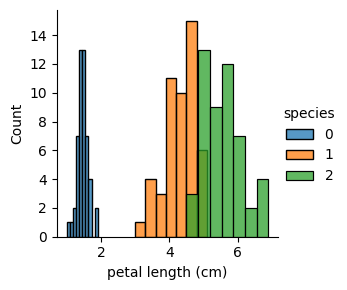

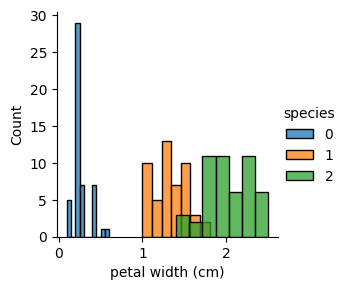

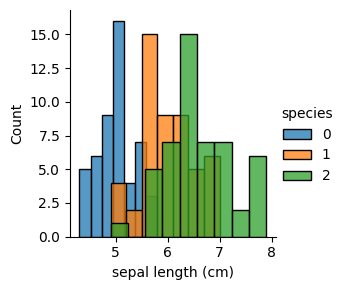

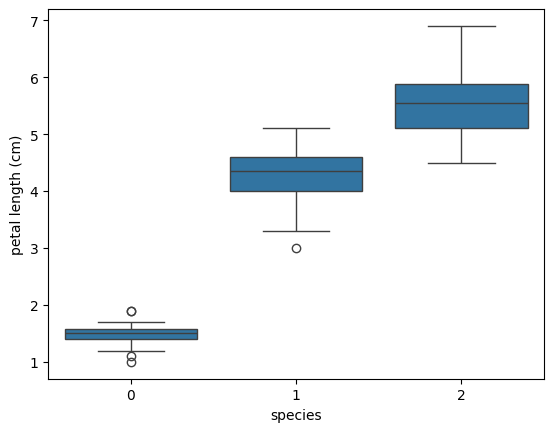

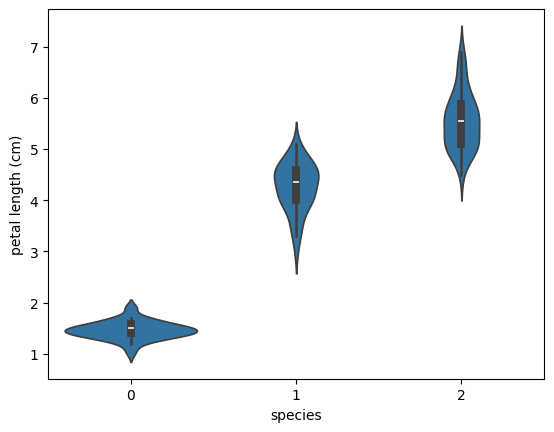

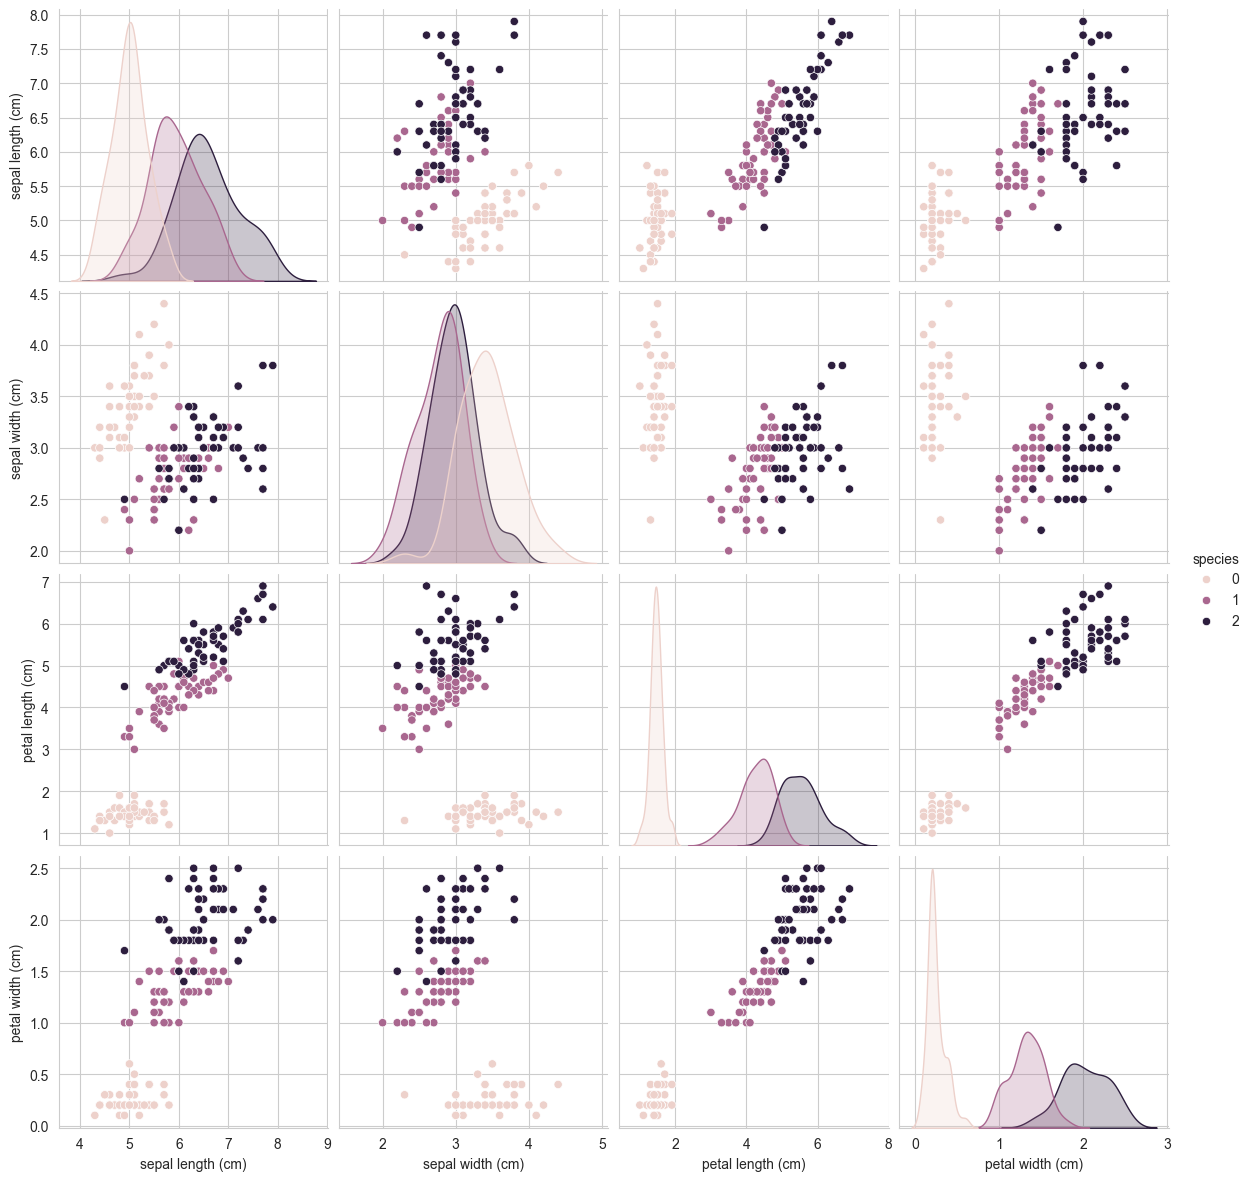

In [3]:
# Frequency distribution of species
iris_outcome = pd.crosstab(index=iris_df["species"], columns="count")
iris_outcome

# Distribution plots
sns.FacetGrid(iris_df, hue="species", height=3).map(sns.histplot, "petal length (cm)").add_legend()
sns.FacetGrid(iris_df, hue="species", height=3).map(sns.histplot, "petal width (cm)").add_legend()
sns.FacetGrid(iris_df, hue="species", height=3).map(sns.histplot, "sepal length (cm)").add_legend()
plt.show()

# Box plot
sns.boxplot(x="species", y="petal length (cm)", data=iris_df)
plt.show()

# Violin plot
sns.violinplot(x="species", y="petal length (cm)", data=iris_df)
plt.show()

# Scatter plot
sns.set_style("whitegrid")
sns.pairplot(iris_df, hue="species", height=3)
plt.show()


- **iris_outcome = pd.crosstab(index=iris_df["species"], columns="count")**: Creates a crosstab showing the frequency distribution of species.
- **sns.FacetGrid(iris_df, hue="species", height=3).map(sns.histplot, "petal length (cm)").add_legend()**: Plots the distribution of petal length.
- **sns.FacetGrid(iris_df, hue="species", height=3).map(sns.histplot, "petal width (cm)").add_legend()**: Plots the distribution of petal width.
- **sns.FacetGrid(iris_df, hue="species", height=3).map(sns.histplot, "sepal length (cm)").add_legend()**: Plots the distribution of sepal length.
- **sns.boxplot(x="species", y="petal length (cm)", data=iris_df)**: Creates a box plot of petal length by species.
- **sns.violinplot(x="species", y="petal length (cm)", data=iris_df)**: Creates a violin plot of petal length by species.
- **sns.pairplot(iris_df, hue="species", height=3)**: Creates scatter plots for all feature pairs.


<h2 style='text-align: center' id='Features'><strong>5. Features</strong></h2>

In [4]:
# Select features for clustering
X_iris = iris_df.iloc[:, :-1].values
y_iris = iris_df.iloc[:, -1].values

- **X_iris = iris_df.iloc[:, :-1].values**: Selects all columns except the last one as features.
- **y_iris = iris_df.iloc[:, -1].values**: Selects the last column as the target variable.

<h2 style='text-align: center' id='Elbow-Method'><strong>6. Elbow Method</strong></h2>

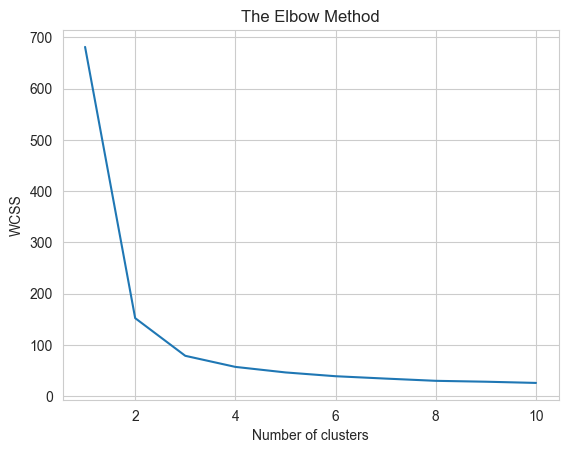

In [5]:
# Finding the optimum number of clusters for K-means classification using the elbow method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.show()

- **wcss = []**: Initializes an empty list to store within-cluster sum of squares (WCSS).
- **for i in range(1, 11)**: Iterates over the number of clusters from 1 to 10.
- **kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)**: Initializes the K-Means model with `i` clusters.
- **kmeans.fit(X_iris)**: Fits the K-Means model to the data.
- **wcss.append(kmeans.inertia_)**: Appends the WCSS of the current model to the list.
- **plt.plot(range(1, 11), wcss)**: Plots the WCSS against the number of clusters.
- **plt.title('The Elbow Method')**: Sets the title of the plot.
- **plt.xlabel('Number of clusters')**: Labels the x-axis.
- **plt.ylabel('WCSS')**: Labels the y-axis.
- **plt.show()**: Displays the plot.

<h2 style='text-align: center' id='KMeans-Clustering'><strong>7. K-Means Clustering</strong></h2>

In [6]:
# Apply K-Means clustering with the optimal number of clusters
kmeans_iris = KMeans(n_clusters=3, random_state=42)
kmeans_iris.fit(X_iris)

# Predict the clusters
y_kmeans = kmeans_iris.predict(X_iris)

- **kmeans_iris = KMeans(n_clusters=3, random_state=42)**: Initializes the K-Means model with 3 clusters.
- **kmeans_iris.fit(X_iris)**: Fits the model to the Iris data.
- **y_kmeans = kmeans_iris.predict(X_iris)**: Predicts the cluster for each data point in the Iris dataset.

<h2 style='text-align: center' id='Evaluation'><strong>8. Evaluation</strong></h2>

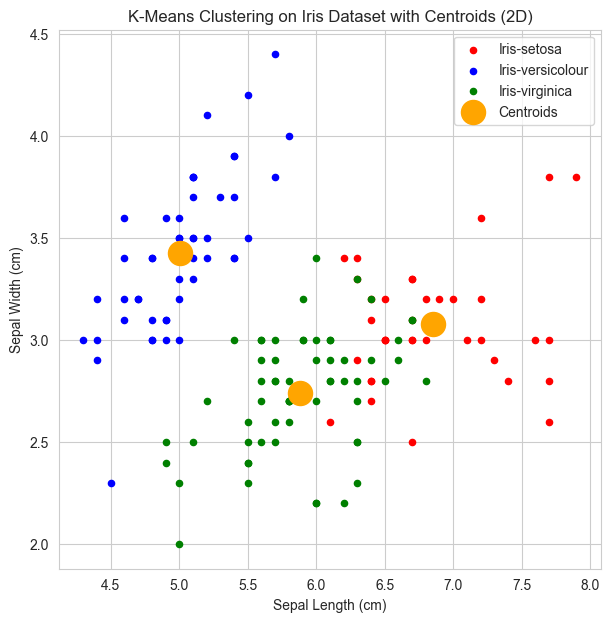

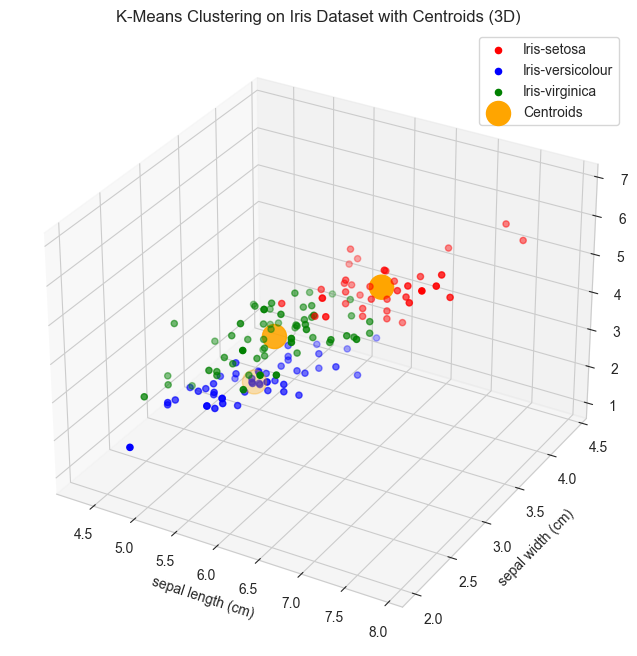

In [17]:
# Plot the clusters with centroids in 2D
fig2D = plt.figure(figsize=(7, 7))
plt.scatter(X_iris[y_kmeans == 0, 0], X_iris[y_kmeans == 0, 1], s=20, c='red', label='Iris-setosa')
plt.scatter(X_iris[y_kmeans == 1, 0], X_iris[y_kmeans == 1, 1], s=20, c='blue', label='Iris-versicolour')
plt.scatter(X_iris[y_kmeans == 2, 0], X_iris[y_kmeans == 2, 1], s=20, c='green', label='Iris-virginica')
plt.scatter(kmeans_iris.cluster_centers_[:, 0], kmeans_iris.cluster_centers_[:, 1], s=300, c='orange', label='Centroids')
plt.legend()
plt.title('K-Means Clustering on Iris Dataset with Centroids (2D)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Plot the clusters with centroids in 3D
fig3D = plt.figure(figsize=(8, 8))
ax = fig3D.add_subplot(111, projection='3d')
ax.scatter(X_iris[y_kmeans == 0, 0], X_iris[y_kmeans == 0, 1], X_iris[y_kmeans == 0, 2], s=20, c='red', label='Iris-setosa')
ax.scatter(X_iris[y_kmeans == 1, 0], X_iris[y_kmeans == 1, 1], X_iris[y_kmeans == 1, 2], s=20, c='blue', label='Iris-versicolour')
ax.scatter(X_iris[y_kmeans == 2, 0], X_iris[y_kmeans == 2, 1], X_iris[y_kmeans == 2, 2], s=20, c='green', label='Iris-virginica')
ax.scatter(kmeans_iris.cluster_centers_[:, 0], kmeans_iris.cluster_centers_[:, 1], kmeans_iris.cluster_centers_[:, 2], s=300, c='orange', label='Centroids')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
plt.title('K-Means Clustering on Iris Dataset with Centroids (3D)')
plt.legend()
plt.show()

- **fig2D = plt.figure(figsize=(7, 7))**: Creates a new figure with a specified size of 7x7.
- **plt.scatter(X_iris[y_kmeans == 0, 0], X_iris[y_kmeans == 0, 1], s=20, c='red', label='Iris-setosa')**: Plots the data points in the first cluster (Iris-setosa) in red with a size of 20.
- **plt.scatter(X_iris[y_kmeans == 1, 0], X_iris[y_kmeans == 1, 1], s=20, c='blue', label='Iris-versicolour')**: Plots the data points in the second cluster (Iris-versicolour) in blue with a size of 20.
- **plt.scatter(X_iris[y_kmeans == 2, 0], X_iris[y_kmeans == 2, 1], s=20, c='green', label='Iris-virginica')**: Plots the data points in the third cluster (Iris-virginica) in green with a size of 20.
- **plt.scatter(kmeans_iris.cluster_centers_[:, 0], kmeans_iris.cluster_centers_[:, 1], s=300, c='orange', label='Centroids')**: Plots the centroids of the clusters in orange with a size of 300.
- **plt.legend()**: Displays the legend on the plot.
- **plt.title('K-Means Clustering on Iris Dataset with Centroids (2D)')**: Sets the title of the plot.
- **plt.xlabel('Sepal Length (cm)')**: Labels the x-axis as 'Sepal Length (cm)'.
- **plt.ylabel('Sepal Width (cm)')**: Labels the y-axis as 'Sepal Width (cm)'.
- **plt.show()**: Displays the plot.

- **fig3D = plt.figure(figsize=(7, 7))**: Creates a new figure with a specified size of 7x7 for the 3D plot.
- **ax = fig3D.add_subplot(111, projection='3d')**: Adds a 3D subplot to the figure.
- **ax.scatter(X_iris[y_kmeans == 0, 0], X_iris[y_kmeans == 0, 1], X_iris[y_kmeans == 0, 2], s=20, c='red', label='Iris-setosa')**: Plots the data points in the first cluster (Iris-setosa) in red with a size of 20 in 3D.
- **ax.scatter(X_iris[y_kmeans == 1, 0], X_iris[y_kmeans == 1, 1], X_iris[y_kmeans == 1, 2], s=20, c='blue', label='Iris-versicolour')**: Plots the data points in the second cluster (Iris-versicolour) in blue with a size of 20 in 3D.
- **ax.scatter(X_iris[y_kmeans == 2, 0], X_iris[y_kmeans == 2, 1], X_iris[y_kmeans == 2, 2], s=20, c='green', label='Iris-virginica')**: Plots the data points in the third cluster (Iris-virginica) in green with a size of 20 in 3D.
- **ax.scatter(kmeans_iris.cluster_centers_[:, 0], kmeans_iris.cluster_centers_[:, 1], kmeans_iris.cluster_centers_[:, 2], s=300, c='orange', label='Centroids')**: Plots the centroids of the clusters in orange with a size of 300 in 3D.
- **ax.set_xlabel('Sepal Length (cm)')**: Labels the x-axis as 'Sepal Length (cm)'.
- **ax.set_ylabel('Sepal Width (cm)')**: Labels the y-axis as 'Sepal Width (cm)'.
- **ax.set_zlabel('Petal Length (cm)')**: Labels the z-axis as 'Petal Length (cm)'.
- **plt.title('K-Means Clustering on Iris Dataset with Centroids (3D)')**: Sets the title of the plot.
- **plt.legend()**: Displays the legend on the plot.
- **plt.show()**: Displays the plot.


<h2 style='text-align: center' id='EasyExampleWithVideo'><strong>9. Easy Example With Video</strong></h2>

<div style='text-align: center'>
    <a href='https://www.instagram.com/p/C9Ft7Wrx4zH/'><img src='Videos/KMeans.png' width='250'/></a>
    <p>Click on the image to watch the video</p>
</div>

## <h2 style='text-align: center' id='Simple-Example'><strong>Simple Example</strong></h2>


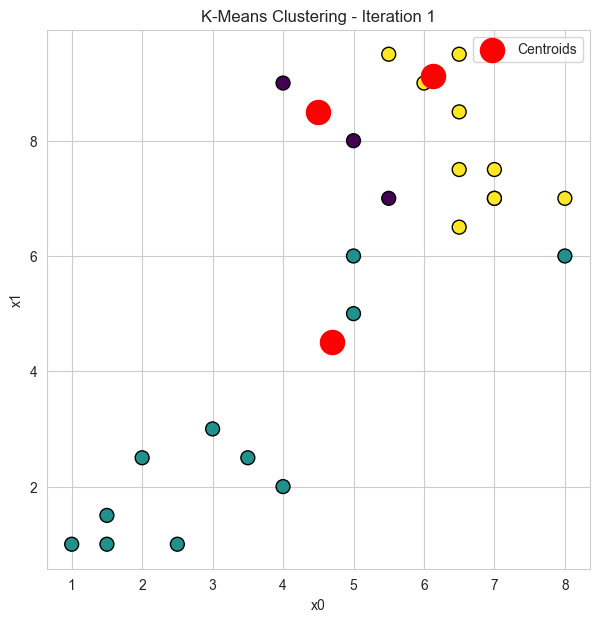

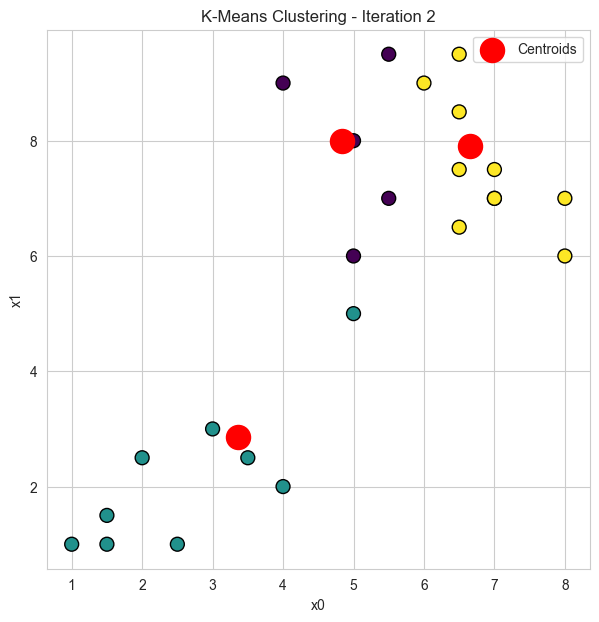

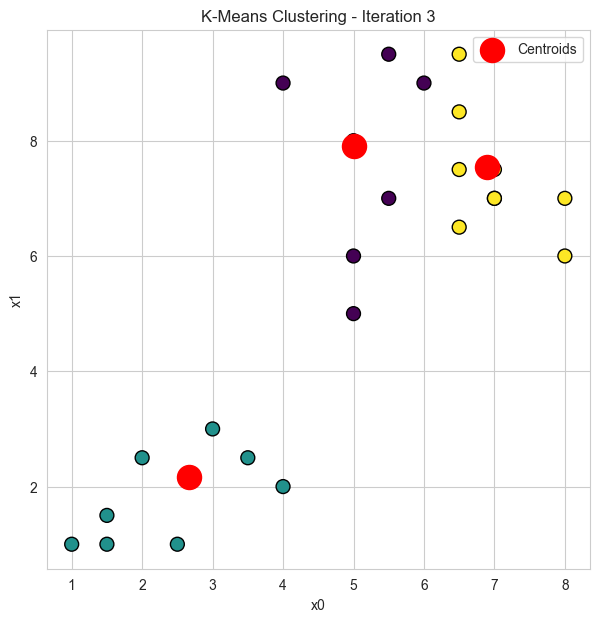

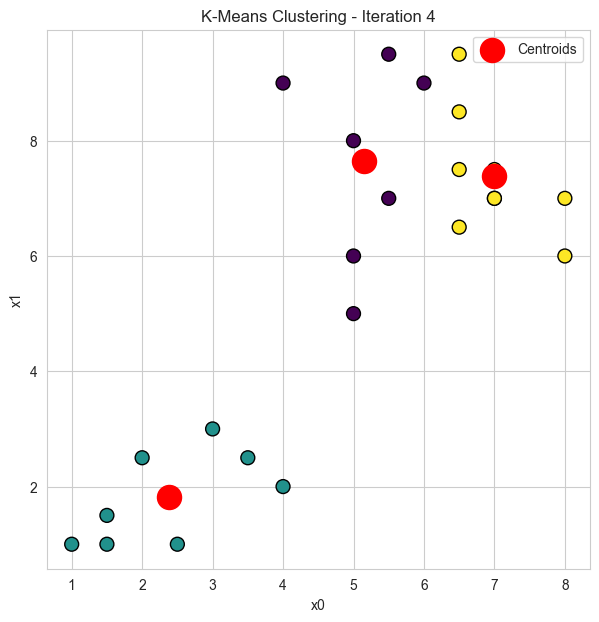

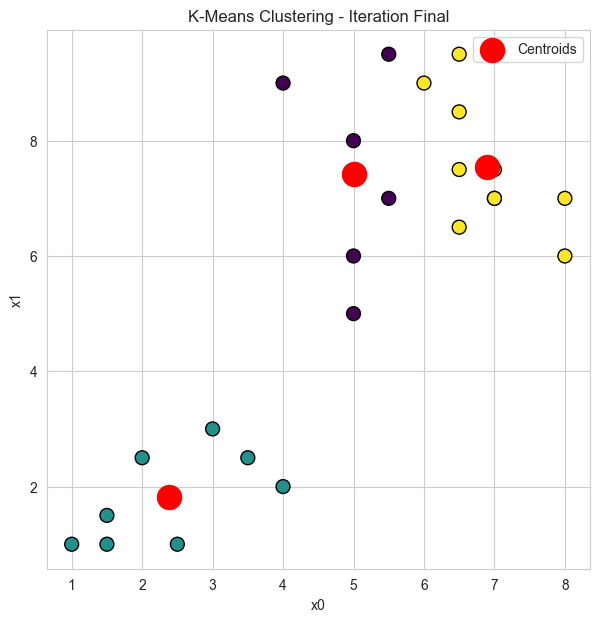

In [62]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a sample dataset with 3 clusters
data = {
    'x0': [1, 1.5, 2, 3.5, 2.5, 1.5, 4, 3, 4, 5.5, 6, 6.5, 5, 5.5, 5, 6.5, 7, 6.5, 5, 7, 8, 6.5, 7, 8],
    'x1': [1, 1, 2.5, 2.5, 1, 1.5, 2, 3, 9, 9.5, 9, 9.5, 6, 7, 5, 7.5, 7, 8.5, 8, 7.5, 6, 6.5, 7, 7]
}
df = pd.DataFrame(data)

# Convert to NumPy array
X = df.values

# Function to plot the clusters and centroids
def plot_clusters(X, kmeans, iteration):
    plt.figure(figsize=(7, 7))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    plt.title(f'K-Means Clustering - Iteration {iteration}')
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.legend()
    plt.show()

# Initialize K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, init='random', max_iter=1, n_init=1, random_state=42)

# Iteration 1
kmeans.fit(X)
plot_clusters(X, kmeans, 1)

# Iteration 2
kmeans.max_iter = 2
kmeans.fit(X)
plot_clusters(X, kmeans, 2)

# Iteration 3
kmeans.max_iter = 3
kmeans.fit(X)
plot_clusters(X, kmeans, 3)

# Iteration 4
kmeans.max_iter = 4
kmeans.fit(X)
plot_clusters(X, kmeans, 4)

# Final Iteration
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
plot_clusters(X, kmeans, 'Final')


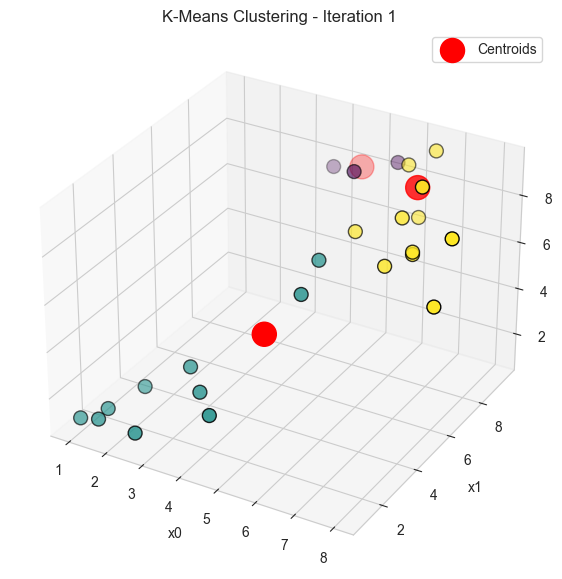

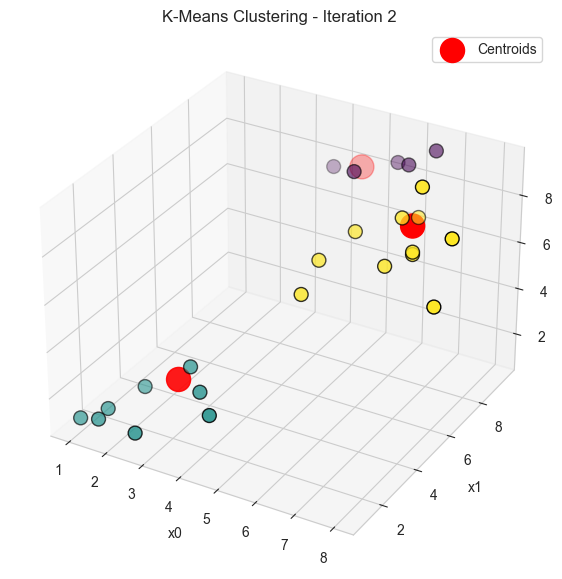

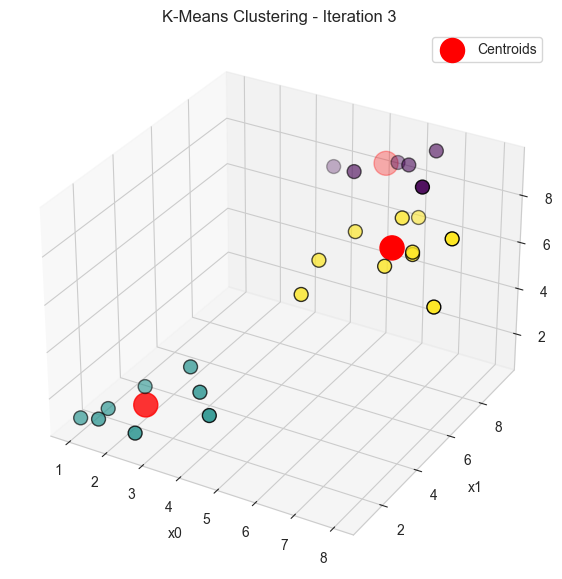

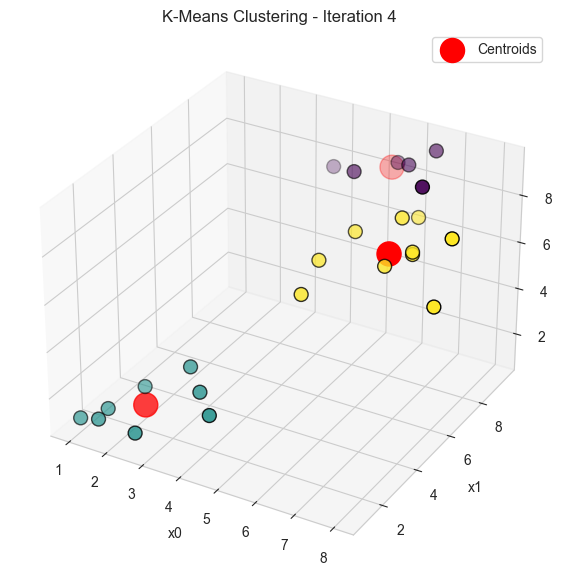

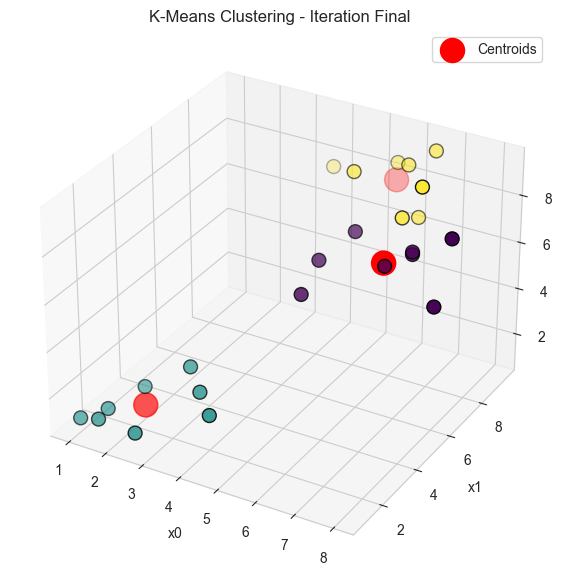

In [63]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Create a sample dataset with 3 clusters in 3D
data = {
    'x0': [1, 1.5, 2, 3.5, 2.5, 1.5, 4, 3, 4, 5.5, 6, 6.5, 5, 5.5, 5, 6.5, 7, 6.5, 5, 7, 8, 6.5, 7, 8],
    'x1': [1, 1, 2.5, 2.5, 1, 1.5, 2, 3, 9, 9.5, 9, 9.5, 6, 7, 5, 7.5, 7, 8.5, 8, 7.5, 6, 6.5, 7, 7],
    'x2': [1, 1.2, 1.8, 2.3, 1.1, 1.3, 1.9, 2.8, 8, 8.5, 8.9, 9.4, 6.3, 7.1, 5.5, 7.8, 6.9, 7.2, 8.8, 9.3, 5.7, 6.4, 6.8, 7.9]
}
df = pd.DataFrame(data)

# Convert to NumPy array
X = df.values

# Function to plot the clusters and centroids in 3D
def plot_clusters_3D(X, kmeans, iteration):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=100)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroids')
    ax.set_title(f'K-Means Clustering - Iteration {iteration}')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_zlabel('x2')
    plt.legend()
    plt.show()

# Initialize K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, init='random', max_iter=1, n_init=1, random_state=42)

# Iteration 1
kmeans.fit(X)
plot_clusters_3D(X, kmeans, 1)

# Iteration 2
kmeans.max_iter = 2
kmeans.fit(X)
plot_clusters_3D(X, kmeans, 2)

# Iteration 3
kmeans.max_iter = 3
kmeans.fit(X)
plot_clusters_3D(X, kmeans, 3)

# Iteration 4
kmeans.max_iter = 4
kmeans.fit(X)
plot_clusters_3D(X, kmeans, 4)

# Final Iteration
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
plot_clusters_3D(X, kmeans, 'Final')


<h2 style='text-align: center' id='Video'><strong>Explanation Video</strong></h2>

<div style='text-align: center'>
    <a href='https://www.instagram.com/reel/C9oEKDaxaHU/?utm_source=ig_web_copy_link&igsh=MzRlODBiNWFlZA=='><img src='Videos/KMeans.png' width='250'/></a>
    <p>Click on the image to watch the video</p>
</div>